In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [3]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,versicolor
13,4.3,3.0,1.1,0.1,setosa
113,5.7,2.5,5.0,2.0,virginica
65,6.7,3.1,4.4,1.4,versicolor
62,6.0,2.2,4.0,1.0,versicolor
133,6.3,2.8,5.1,1.5,virginica
26,5.0,3.4,1.6,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
0,5.1,3.5,1.4,0.2,setosa
34,4.9,3.1,1.5,0.2,setosa


#### Frequency Table example

In [4]:
items = df.sample(75)['sepal_length'].value_counts().items()
ft = []
for index, value in items:
    if value < 4:
        continue
    ft.append((index, value))
FrquencyTable = pd.DataFrame(ft)
FrquencyTable.columns = ['value', 'frequency']
FrquencyTable

,value,frequency
0,5.0,6
1,6.7,6
2,5.7,5
3,5.8,4
4,6.0,4
5,6.4,4
6,4.8,4
7,6.5,4


# Measures of  Central Tendency

- ## Mean

The **Mean** or **Arithmetic Average** is the value obtained by dividing the sum of all the data by the total number of data points.

**Population Mean** <br>
$$ 
\Large\mu = \dfrac{\sum x}{N} 
$$

**Sample Mean** <br>
$$ 
\Large\bar x = \dfrac{\sum x}{n} 
$$

-------------------------------------------------
- Calculating mean for Frequency Table

$$ 
\bar x = \dfrac{\sum (x * f)}{n} 
$$
where $ f $ is the frequency for any data point

-------------------------------------------------
- Calculating mean for Grouped Frequency Table

$$ 
\bar x = \dfrac{\sum (m * f)}{n} 
$$

where, $$
m = \dfrac{upper bound + lower bound}{2}
$$

**Note: Differnet Types of Mean**

1. Arithmatic mean <br>
$ \Large AM = \dfrac{\sum {x}}{n} $

eg. Calculating avg marks <br><br>


2. Geometric Mean <br>
$ \Large GM = \sqrt[n]{\prod{x}} $

eg. Average yearly rate of return for given yearly returns for $n$ years <br><br>


3. Harmonic Mean <br>
$ \Large HM = \dfrac{n} {\sum{\Bigg(\dfrac{1}{x}\Bigg)}} $

eg. Average speed across fixed distance instead of across fixed time <br>

In [5]:
vals = df.sample(20)['sepal_length'].values
print("Mean using Numpy function: ", np.mean(vals))
vals_mean = sum(list(vals)) / 20
print("Mean using formula: ", vals_mean)

Mean using Numpy function:  5.765000000000001
Mean using formula:  5.765000000000001


In [6]:
df.sample(50)['sepal_length'].value_counts().iloc[0]

4

- ## Median

**Median** refers to the data situated at exactly the middle location of the distribution.

If $ X $ is an ordered dataset then
$$  
\Large Med(X) = \begin{cases}
    X\Bigg[\dfrac{n+1}{2}\Bigg] &  \text{if n is odd}\\
    \dfrac{X\Bigg[\dfrac{n}{2}\Bigg] + X\Bigg[\dfrac{n}{2} + 1\Bigg]}{2} &  \text{if n is even}
\end{cases}
$$
where $ N $ is number of values in the dataset

-------------------------------------------------
For a grouped frequency table,

$$ 
Median = L + \Bigg[ \dfrac{ \dfrac{n}{2} + cf } {f} \Bigg] \cdot h  
$$
where, <br>
$ N $ = Number of values in the dataset <br>
$ L $ = Lower limit of the median class <br>
$cf $ = Cumulative frequency of previous class <br>
$ f $ = Frequency of the median class <br>
$ h $ = Width of the class    

In [7]:
print('values', list(vals))
print("Median using Numpy function: ", np.median(vals))
sorted_vals = sorted(list(vals))
print('Sorted values', sorted_vals)
vals_median = (sorted_vals[9] + sorted_vals[10]) / 2   # 10th and 11th value
print("Median using formula: ", vals_median)

values [4.9, 5.3, 7.7, 4.6, 6.7, 6.4, 5.7, 6.5, 5.8, 5.1, 6.7, 6.1, 6.7, 5.4, 5.1, 6.0, 5.0, 4.3, 4.9, 6.4]
Median using Numpy function:  5.75
Sorted values [4.3, 4.6, 4.9, 4.9, 5.0, 5.1, 5.1, 5.3, 5.4, 5.7, 5.8, 6.0, 6.1, 6.4, 6.4, 6.5, 6.7, 6.7, 6.7, 7.7]
Median using formula:  5.75


- ## Mode

The Mode refers to the data value that occurs most frequently in a given dataset. Hence, it uses the frequency (repetition) of a certain value to be a representative of the central tendency of data. 

If two (or more) values occur with the same frequency in a dataset, both (or all) of the items are considered the mode of the data and the data set is **multimodal**.

--------------------------------------------------------------------------------
For a grouped frequency table,
$$
Mode = L + \Bigg( \dfrac{f_{1} - f_{0}} {2f_{1} - f_{0} - f_{2}} \Bigg)
$$
where, <br>
$ L $ = Lower limit of the modal class <br>
$ f_{1} $ = freuency of the modal class <br>
$ f_{0} $ = freuency of the previous class <br>
$ f_{2} $ = freuency of the next class <br>
$ h $ = Width of the class 

# Finding statistics for given dataframe

In [8]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
123,6.3,2.7,4.9,1.8,virginica
121,5.6,2.8,4.9,2.0,virginica
144,6.7,3.3,5.7,2.5,virginica
120,6.9,3.2,5.7,2.3,virginica
74,6.4,2.9,4.3,1.3,versicolor
147,6.5,3.0,5.2,2.0,virginica
98,5.1,2.5,3.0,1.1,versicolor
5,5.4,3.9,1.7,0.4,setosa
72,6.3,2.5,4.9,1.5,versicolor
45,4.8,3.0,1.4,0.3,setosa


In [9]:
df.mean(axis=0, numeric_only=True)

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [10]:
df.median(axis=0, numeric_only=True)

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [11]:
df.mode(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.0,1.4,0.2
1,NaN,NaN,1.5,NaN


# Quantiles
**Quantiles are the way of splitting dataset into even sections.**

**Quartile** : Quartile points splits the ordered dataset into four even sections. **(Q1, Q2(median), Q3)** <br>
**Decile** : Decile points splits the ordered dataset into ten even sections. **(D1, D2, ..., D8, D9)** <br>
**Percentile**: It is a value below which the given percentage of observtions lie. <br>



0 quartile = 0 percentile   = 0 quantile <br>
1 quartile = 25 percentile  = .25 quantile  <br>
2 quartile = 50 percentile  = .5 quantile = 5 decile = median  <br>
3 quartile = 75 percentile  = .75 quantile  <br>
4 quartile = 100 percentile = 1 quantile  <br>


In [12]:
df.quantile(0.3,numeric_only=True)

sepal_length    5.27
sepal_width     2.80
petal_length    1.70
petal_width     0.40
Name: 0.3, dtype: float64

In [13]:
pd.DataFrame([df.median(numeric_only=True), df.quantile(0.50,numeric_only=True)], index=["median", "50 percentile"])

,sepal_length,sepal_width,petal_length,petal_width
median,5.8,3.0,4.35,1.3
50 percentile,5.8,3.0,4.35,1.3


**Five Point Summary** <br>
1. Minimum
2. First Quartile(Q1)
3. Median
4. Third Quartile(Q3)
5. Maximum

In [14]:
fvs = df.describe().iloc[3:, :]
fvs.rename(index={"25%":"Q1", "50%":"median","75%":"Q3"})

,sepal_length,sepal_width,petal_length,petal_width
min,4.3,2.0,1.00,0.1
Q1,5.1,2.8,1.60,0.3
median,5.8,3.0,4.35,1.3
Q3,6.4,3.3,5.10,1.8
max,7.9,4.4,6.90,2.5


# Measures of Variability / Dispersion

- ## Range | InterQuartile Range

**Range =** $max - min$ <br>
**IQR =** $Q_{3} - Q_{1}$

##### Why bother with inter-quartile range ?
Range is susceptible to the outliers. IQR is used in box-whiskers plot to determine length of whisker to finding ouliers.

- ## Variance

**Variance** measures how data is spread around the mean.

$ \sigma ^ 2 $ : Variance of the population  <br>
$ s ^ 2 $ : Variance of the sample

$$
\Large s^2 = \dfrac{\sum (X_{i} - \bar X)^2} {n-1}
$$

------------------------------------------------------------------------------------------------------------------

- ## Standard deviation

The square valued variance gives extra weight to outliers.<br> 
Hence, **Standard Deviation** = $\sqrt{}$ Variance

$ \sigma $ : Std. Deviation of the population  <br>
$ s $ : Std. Deviation of the sample

$$
\Large s = \sqrt{\dfrac{\sum (X_{i} - \bar X)^2} {n-1}}
$$

In [15]:
#variance
df.var(axis=0, numeric_only=True)

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

In [16]:
#std. deviation
df.std(axis=0, numeric_only=True)

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

> For population,
$$
\Large \sigma = \sqrt{\dfrac{\sum (X_{i} - \mu)^2} {N}}
$$
------------------------------------------------------

**Why do bother with "variance"<br> 
(ie why square ?)**<br>
Deviation from the mean for some observations is negative. In case of mean absolute deviation absolute values are taken which makes it less sensitive to outliers. Hence std. deviation is square root of variance.
Laplace preferred absolute values. But squared values preferred by Gauss are convention because for minimizing variability function with squared values were easy to differentiate (in calculus).

**Why $n-1$ in sample calculations**<br>
The **variance** is the average squared deviation from the **population mean**. Population mean $\mu$ is unknown in practical situations. Hence we estimate its value by taking **sample mean** $\bar x$. Hence, the **sample mean** is one of the POSSIBLE position for the true population mean. At any other position, the sum of the squares would be larger. Hence smaller denominator adjusts the variance estimate upwards. The value $1$ is statistically derived.<br>

**Degrees of freedom: https://youtu.be/wpY9o_OyxoQ?t=646**

**Visualizing spread using density estimate plot**

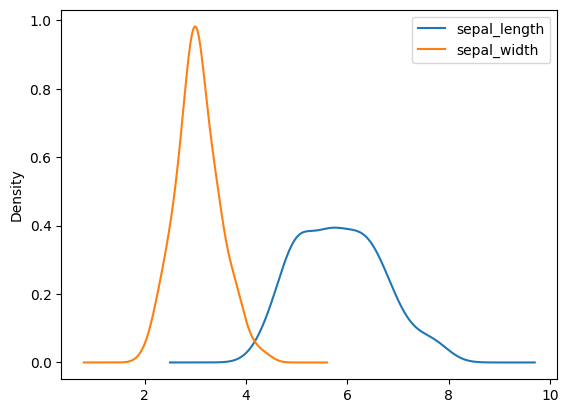

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
df[['sepal_length', 'sepal_width']].plot.kde()
plt.show()

- ## Coefficient Of Variation

While comparing two datasets values std. deviation doesn't take under consideration the scale of the the dataset. Hence, **coefficient of variation** is used.
$$
CV = \Large\dfrac{s}{\bar x}
$$

In [18]:
#Consider, 
X = np.array([1, 2, 3])
Y = np.array([101, 102, 103])
#Here, 
print(f"Sx : {np.std(X, ddof=1)}")
print(f"Sy : {np.std(Y, ddof=1)}")

Sx : 1.0
Sy : 1.0


In [19]:
"""here Sx and Sy are equal but if we consider the scales of datasets,
the spread in dataset X is as the largest value is triple of the smallest."""
print(f"CVx : {np.std(X, ddof=1)/np.mean(X)}")
print(f"CVy : {np.std(Y, ddof=1)/np.mean(Y)}")

CVx : 0.5
CVy : 0.00980392156862745


**Hence, in terms of scale spread in dataset Y is lesser.**